In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\cwurData.csv
input\database_earthquake.csv
input\education_expenditure_supplementary_data.csv
input\Iris.csv
input\MedianHouseholdIncome2015.csv
input\PercentagePeopleBelowPovertyLevel.csv
input\PercentOver25CompletedHighSchool.csv
input\PoliceKillingsUS.csv
input\school_and_country_table.csv
input\shanghaiData.csv
input\ShareRaceByCity.csv
input\timesData.csv
input\fifa19\data.csv
input\weatherww2\Summary of Weather.csv
input\weatherww2\Weather Station Locations.csv
input\world-war-ii\operations.csv


In [3]:
# Verileri okuma
data = pd.read_csv('input/fifa19/data.csv', encoding='ISO-8859-1')

# Verinin ilk birkaç satırını gösterme
data.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [4]:
data.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18206 non-null  float64
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18206 non-null  float64
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
data.Club.unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Be?ikta? JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [8]:
data.Nationality.value_counts()

Nationality
England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: count, Length: 164, dtype: int64

Bar Plot


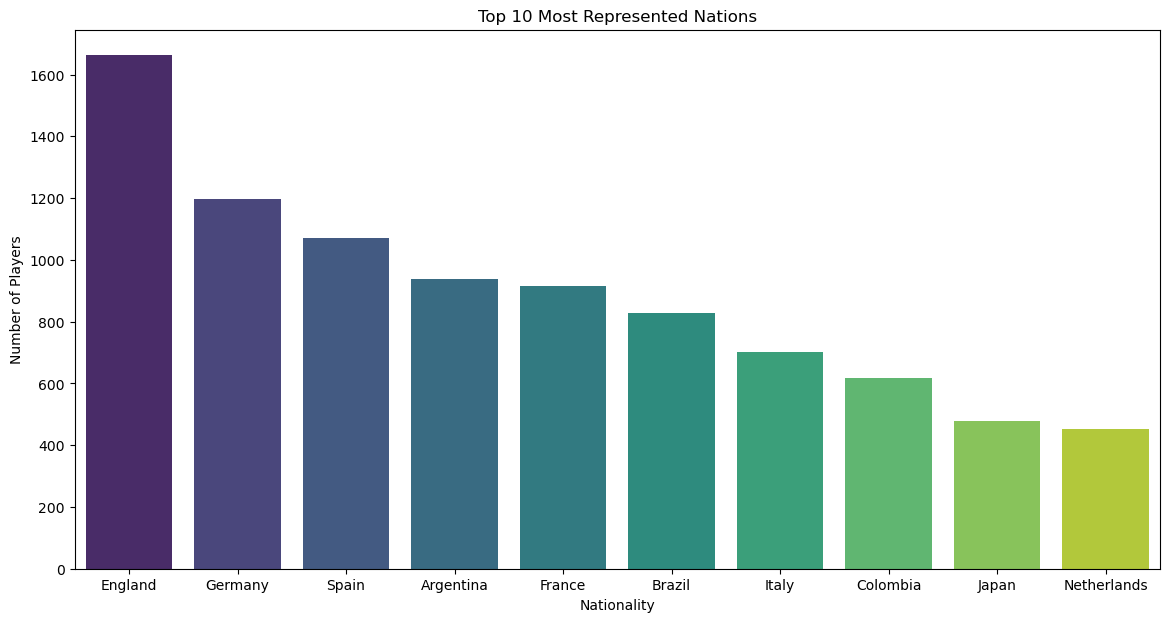

In [9]:
# En çok temsil edilen 10 ülkenin grafiği
plt.figure(figsize=(14, 7))
most_represented_nations = data['Nationality'].value_counts().head(10)
sns.barplot(x=most_represented_nations.index, y=most_represented_nations.values, palette='viridis')
plt.title('Top 10 Most Represented Nations')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.show()


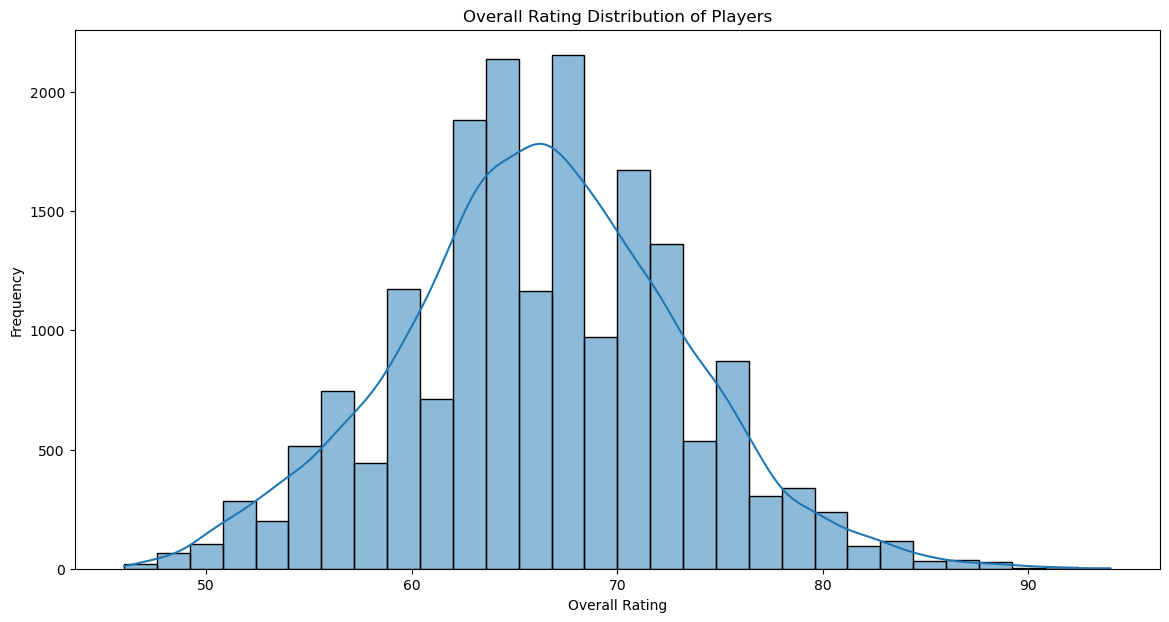

In [10]:
# Oyuncuların genel performans (Overall) puanı dağılımı
plt.figure(figsize=(14, 7))
sns.histplot(data['Overall'], bins=30, kde=True)
plt.title('Overall Rating Distribution of Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


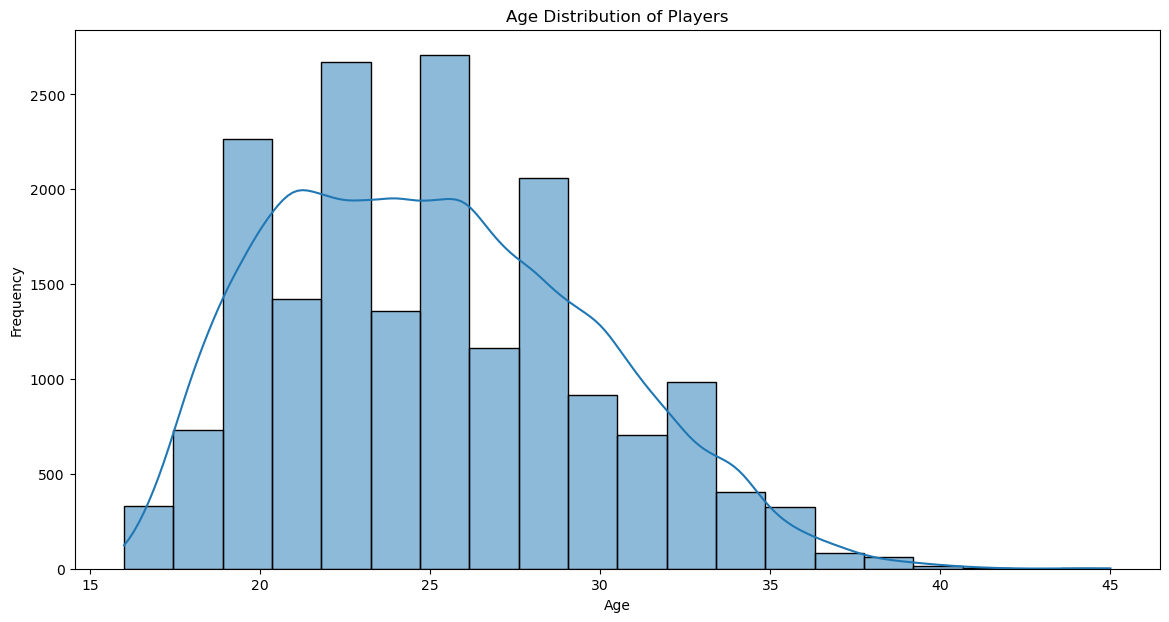

In [11]:
# Oyuncuların yaş dağılımı
plt.figure(figsize=(14, 7))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


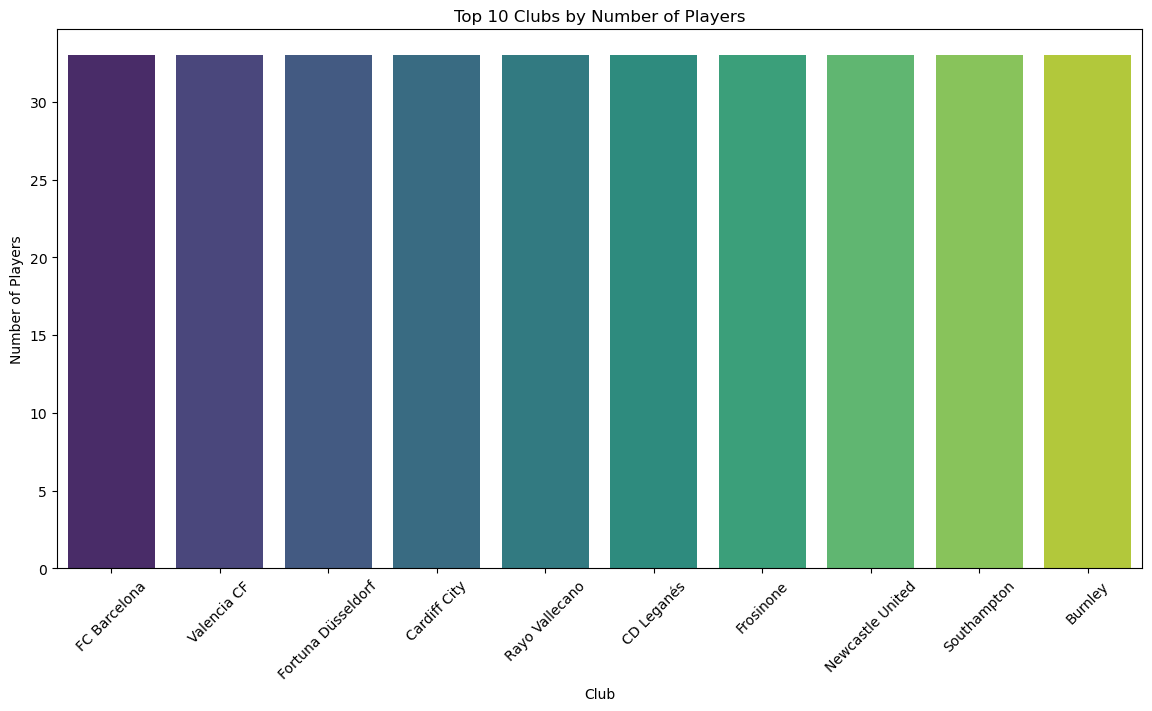

In [12]:
# Belirli kulüplerin oyuncu sayısının grafiği
plt.figure(figsize=(14, 7))
most_represented_clubs = data['Club'].value_counts().head(10)
sns.barplot(x=most_represented_clubs.index, y=most_represented_clubs.values, palette='viridis')
plt.title('Top 10 Clubs by Number of Players')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


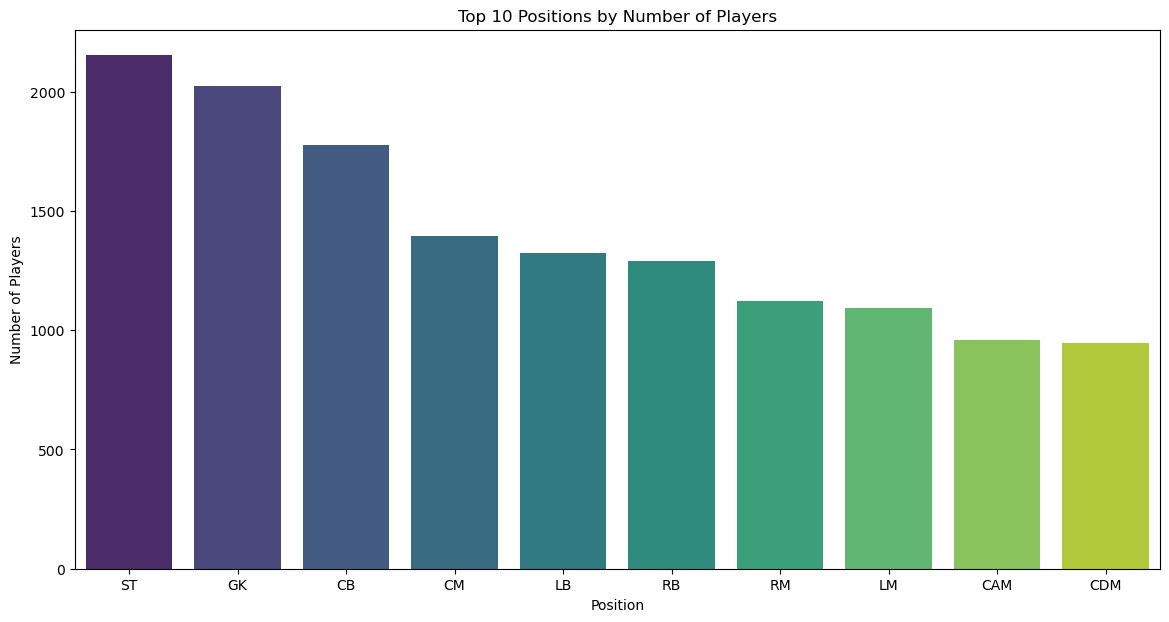

In [13]:
# Belirli pozisyonların dağılımı
plt.figure(figsize=(14, 7))
most_common_positions = data['Position'].value_counts().head(10)
sns.barplot(x=most_common_positions.index, y=most_common_positions.values, palette='viridis')
plt.title('Top 10 Positions by Number of Players')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()


In [14]:
# Türk futbolcuların alt kümesini oluşturma
data1 = data[data['Nationality'] == "Turkey"][['Name', 'Overall', 'Potential', 'Position']]
data1.head()


,Name,Overall,Potential,Position
383,O. Toprak,81.0,82,CB
449,H. Çalhano?lu,80.0,84,CAM
659,C. Tosun,79.0,80,ST
705,N. ?ahin,79.0,79,CDM
721,B. Y?lmaz,79.0,79,ST


In [15]:
# Türk futbolcuların sayısını ve genel performans ortalamasını gösterme
print(f"Number of Turkish players: {data1.shape[0]}")
print(f"Average Overall Rating: {data1['Overall'].mean():.2f}")


Number of Turkish players: 303
Average Overall Rating: 66.07


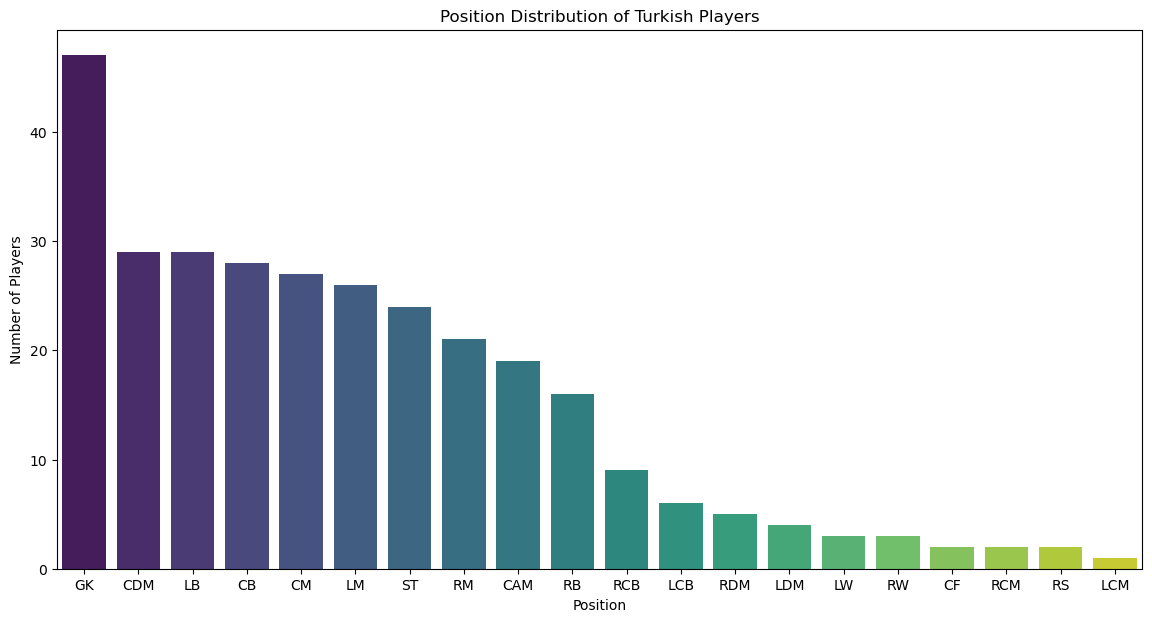

In [16]:
# Türk futbolcuların pozisyonlarına göre dağılımını görselleştirme
plt.figure(figsize=(14, 7))
position_counts = data1['Position'].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')
plt.title('Position Distribution of Turkish Players')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()


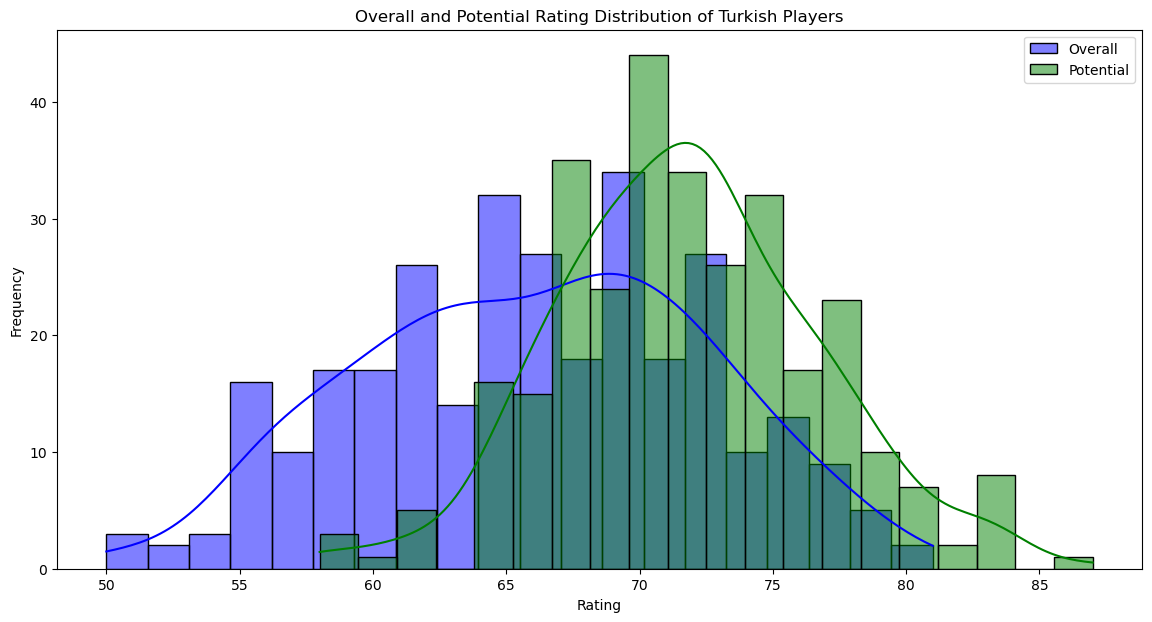

In [17]:
# Türk futbolcuların genel performans ve potansiyel puanlarının dağılımını görselleştirme
plt.figure(figsize=(14, 7))
sns.histplot(data1['Overall'], bins=20, kde=True, color='blue', label='Overall')
sns.histplot(data1['Potential'], bins=20, kde=True, color='green', label='Potential')
plt.title('Overall and Potential Rating Distribution of Turkish Players')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [18]:
# Soyadlarını ayrıştırma ve en yaygın 25 soyadını belirleme
data1['Surname'] = data1['Name'].apply(lambda x: x.split()[-1])
most_common_surnames = data1['Surname'].value_counts().head(25)
most_common_surnames


Surname
Çelik       4
Öztürk      3
Turan       3
Demir       3
Kaya        3
Y?ld?r?m    3
?ahin       3
Erdo?an     2
Durmu?      2
Arslan      2
?nan        2
Özer        2
Ça??ran     2
Ayhan       2
Akkan       2
Dursun      2
Y?lmaz      2
Vural       2
Ünal        2
Acar        2
Akgün       2
Çak?r       2
Özkan       2
Babacan     2
Özdemir     2
Name: count, dtype: int64

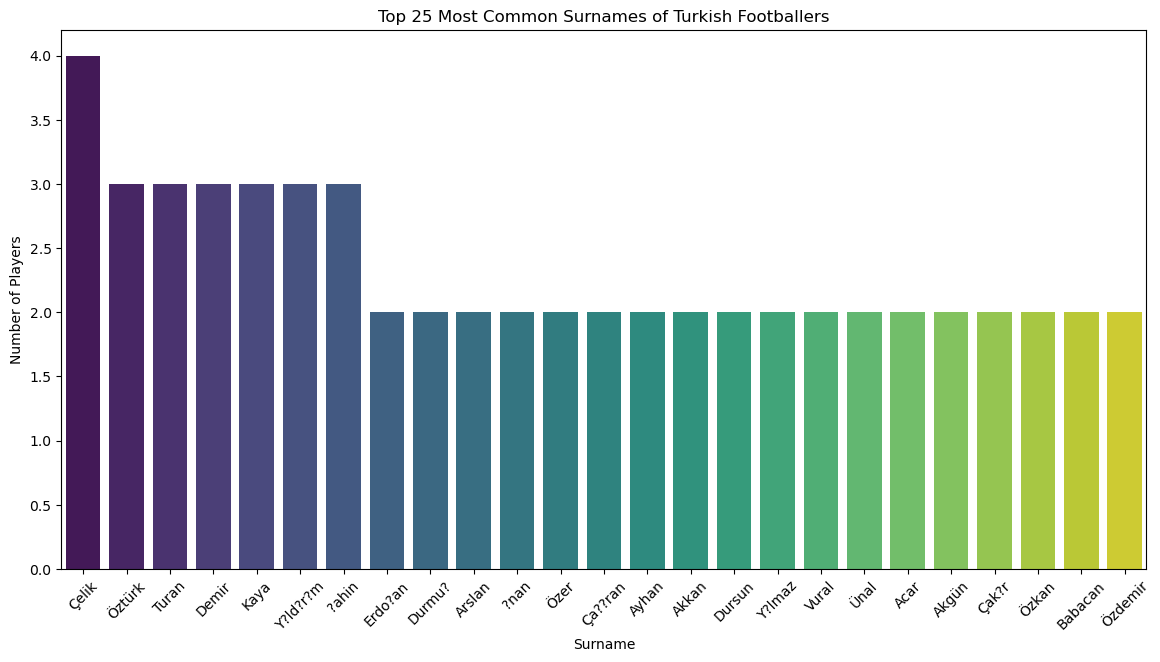

In [19]:
# En yaygın 25 soyadının grafiğini oluşturma
plt.figure(figsize=(14, 7))
sns.barplot(x=most_common_surnames.index, y=most_common_surnames.values, palette='viridis')
plt.title('Top 25 Most Common Surnames of Turkish Footballers')
plt.xlabel('Surname')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Her pozisyon için genel performans (Overall) puanlarının ortalamasını hesaplama
position_overall = data1.groupby('Position')['Overall'].mean().sort_values(ascending=False)
position_overall


Position
RDM    71.800000
LCB    71.666667
RCB    70.666667
LDM    70.500000
RM     69.761905
LCM    69.000000
CAM    68.894737
RCM    68.000000
RB     67.687500
LB     67.103448
LW     66.333333
RS     66.000000
CF     66.000000
LM     65.769231
CB     64.892857
CDM    64.620690
GK     64.404255
ST     64.041667
RW     63.333333
CM     62.481481
Name: Overall, dtype: float64

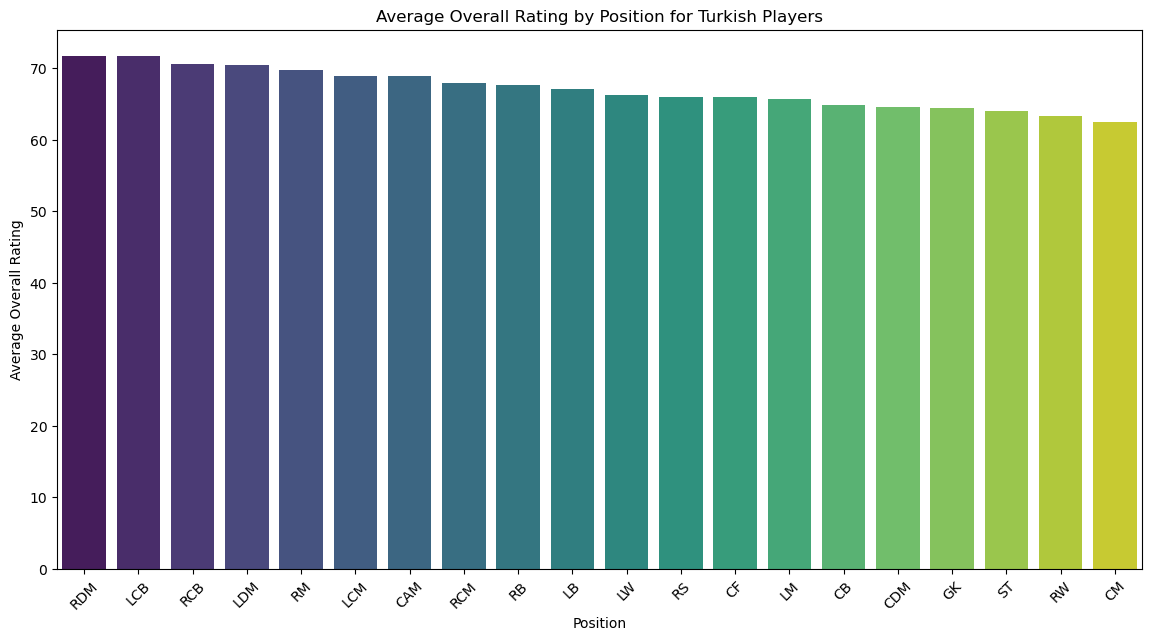

In [21]:
# Her pozisyon için genel performans (Overall) puanlarının ortalamasını görselleştirme
plt.figure(figsize=(14, 7))
sns.barplot(x=position_overall.index, y=position_overall.values, palette='viridis')
plt.title('Average Overall Rating by Position for Turkish Players')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Her pozisyon için potansiyel (Potential) puanlarının ortalamasını hesaplama
position_potential = data1.groupby('Position')['Potential'].mean().sort_values(ascending=False)
position_potential


Position
LW     75.333333
CF     75.000000
RCB    74.222222
LCB    73.833333
RM     73.571429
CAM    73.526316
RDM    72.800000
LDM    72.750000
LM     72.115385
CB     72.107143
ST     72.041667
CDM    71.793103
RB     71.750000
CM     71.444444
RW     71.000000
RCM    70.500000
LB     70.344828
GK     69.872340
RS     69.500000
LCM    69.000000
Name: Potential, dtype: float64

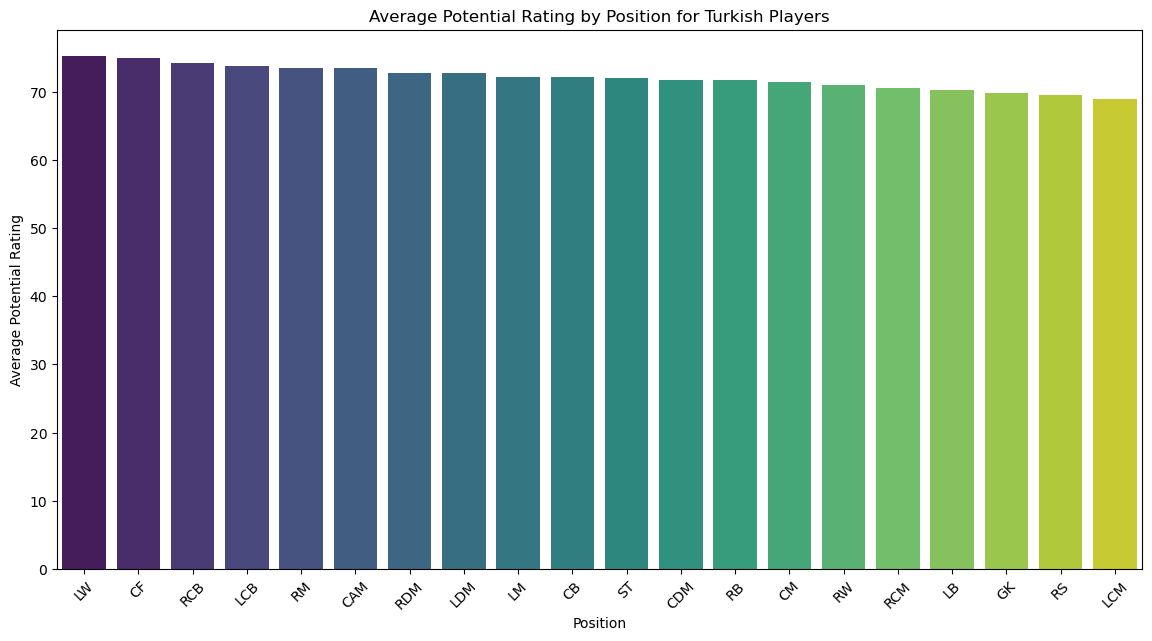

In [24]:
# Her pozisyon için potansiyel (Potential) puanlarının ortalamasını görselleştirme
plt.figure(figsize=(14, 7))
sns.barplot(x=position_potential.index, y=position_potential.values, palette='viridis')
plt.title('Average Potential Rating by Position for Turkish Players')
plt.xlabel('Position')
plt.ylabel('Average Potential Rating')
plt.xticks(rotation=45)
plt.show()


Point Plot


In [27]:
# Verileri okuma
data = pd.read_csv('input/fifa19/data.csv', encoding='ISO-8859-1')


In [28]:
# Türk futbolcuların alt kümesini oluşturma
data1 = data[data['Nationality'] == "Turkey"][['Name', 'Overall', 'Potential', 'Position']]
data1.head()


,Name,Overall,Potential,Position
383,O. Toprak,81.0,82,CB
449,H. Çalhano?lu,80.0,84,CAM
659,C. Tosun,79.0,80,ST
705,N. ?ahin,79.0,79,CDM
721,B. Y?lmaz,79.0,79,ST


In [29]:
# Her pozisyon için genel performans (Overall) ve potansiyel (Potential) puanlarının ortalamasını hesaplama
position_stats = data1.groupby('Position').agg({'Overall': 'mean', 'Potential': 'mean'}).sort_values(by='Overall', ascending=False)
position_stats


,Overall,Potential
Position,,
RDM,71.800000,72.800000
LCB,71.666667,73.833333
RCB,70.666667,74.222222
LDM,70.500000,72.750000
RM,69.761905,73.571429
LCM,69.000000,69.000000
CAM,68.894737,73.526316
RCM,68.000000,70.500000
RB,67.687500,71.750000


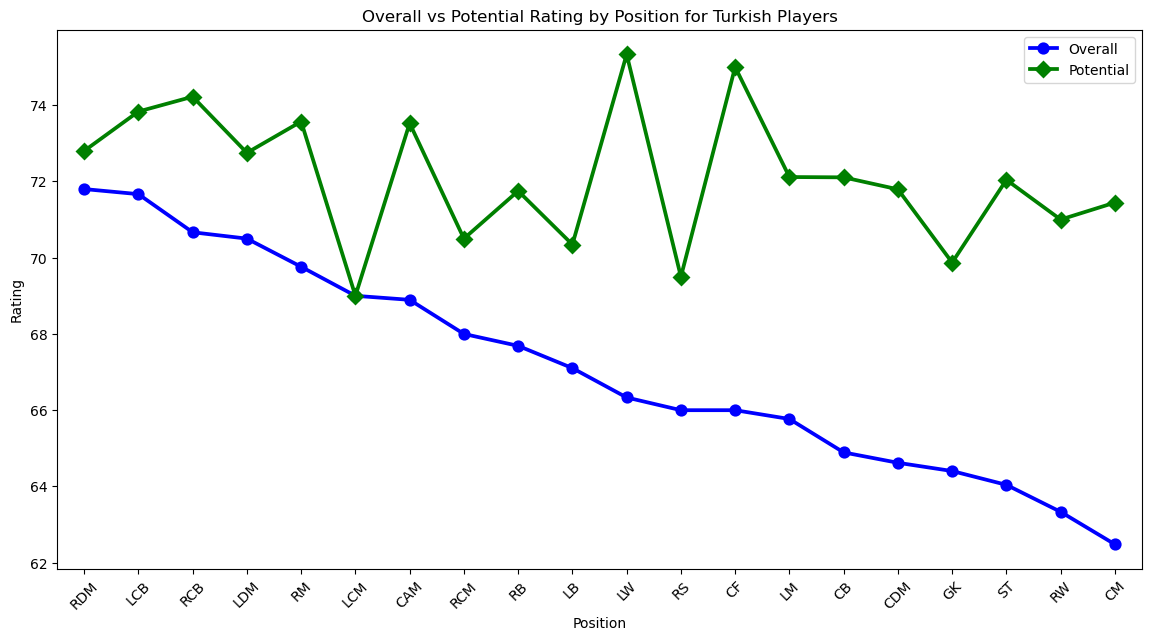

In [30]:
# Genel performans (Overall) ve potansiyel (Potential) puanlarının karşılaştırmasını point plot ile görselleştirme
plt.figure(figsize=(14, 7))
sns.pointplot(data=position_stats.reset_index(), x='Position', y='Overall', color='blue', markers='o', label='Overall')
sns.pointplot(data=position_stats.reset_index(), x='Position', y='Potential', color='green', markers='D', label='Potential')
plt.title('Overall vs Potential Rating by Position for Turkish Players')
plt.xlabel('Position')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [32]:
position_stats.head()


,Overall,Potential
Position,,
RDM,71.800000,72.800000
LCB,71.666667,73.833333
RCB,70.666667,74.222222
LDM,70.500000,72.750000
RM,69.761905,73.571429


Joint Plot


Index(['Position', 'Overall_Rating', 'Potential_Rating'], dtype='object')


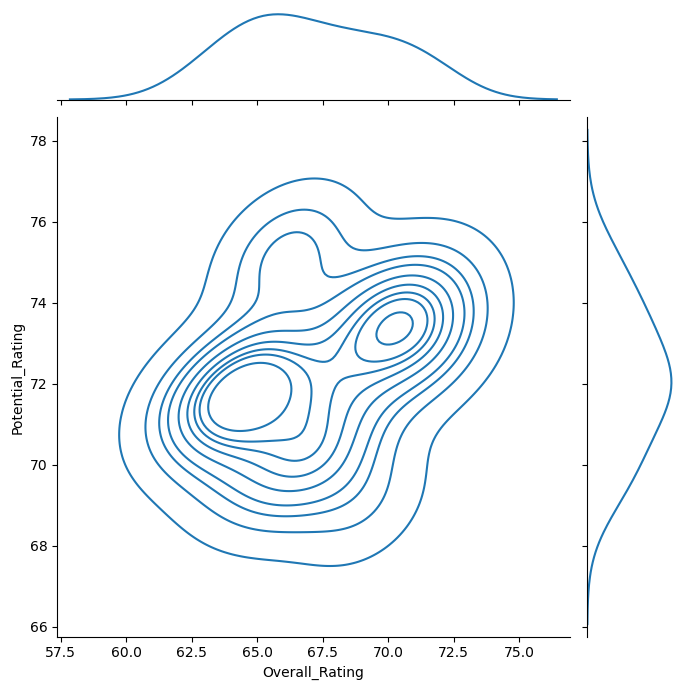

In [35]:
# Her pozisyon için genel performans (Overall) ve potansiyel (Potential) puanlarının ortalamasını hesaplama
position_stats = data1.groupby('Position').agg({'Overall': 'mean', 'Potential': 'mean'}).reset_index()
position_stats.rename(columns={'Overall': 'Overall_Rating', 'Potential': 'Potential_Rating'}, inplace=True)

# Sütun adlarını kontrol etme (debugging)
print(position_stats.columns)

# KDE grafiğini oluşturma
g = sns.jointplot(x='Overall_Rating', y='Potential_Rating', data=position_stats, kind="kde", height=7)
plt.savefig('graph.png')
plt.show()

Pie Chart


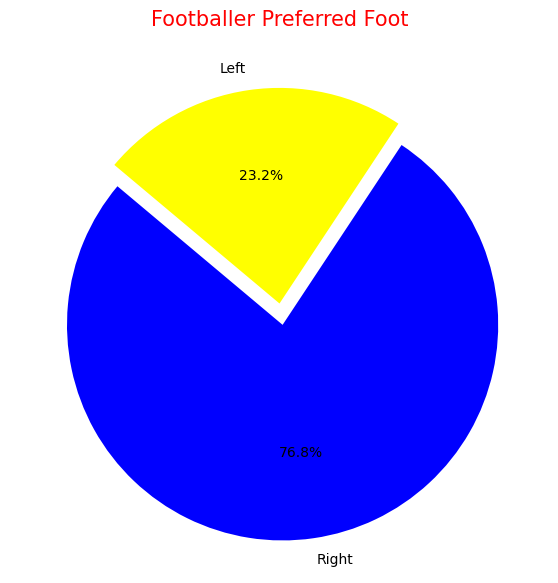

In [38]:
import matplotlib.pyplot as plt

# Prepare data
labels = data["Preferred Foot"].value_counts().index
colors = ['blue', 'yellow']
sizes = data["Preferred Foot"].value_counts().values
explode = [0.1, 0]  # To highlight the first slice

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Footballer Preferred Foot', color='red', fontsize=15)
plt.show()


LM Plot


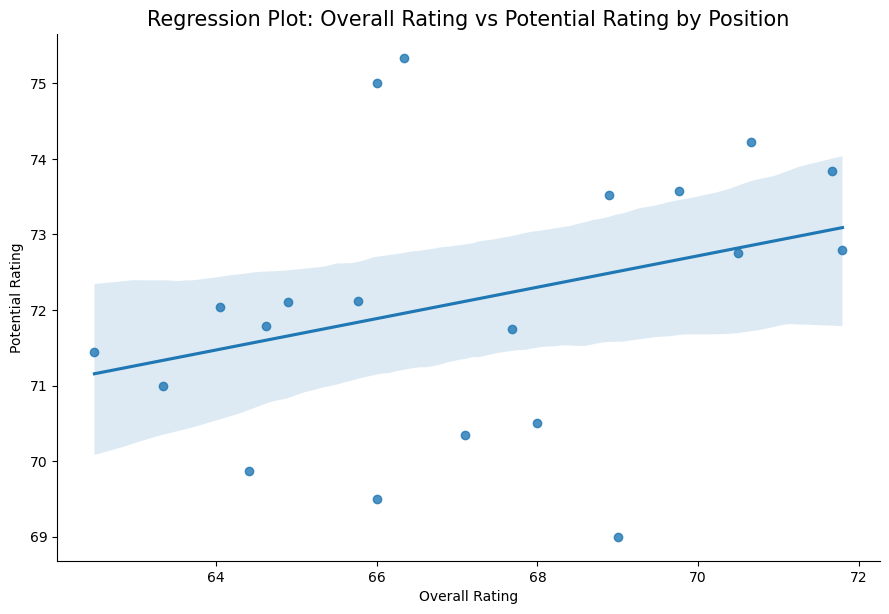

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'position_stats' veri çerçevesinde sütun adlarını doğrulayın
# Sütun adlarının 'Overall_Rating' ve 'Potential_Rating' olduğundan emin olun

# Regression plot oluşturma
sns.lmplot(x="Overall_Rating", y="Potential_Rating", data=position_stats, aspect=1.5, height=6)
plt.title('Regression Plot: Overall Rating vs Potential Rating by Position', fontsize=15)
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.show()


KDE

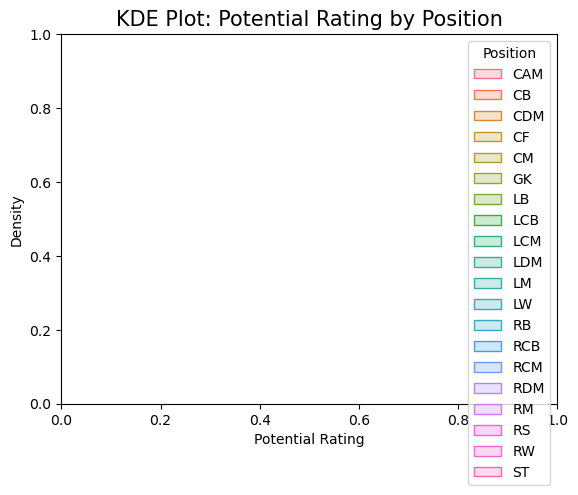

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Potential Rating için KDE plot oluşturma
sns.kdeplot(data=position_stats, x="Potential_Rating", hue="Position", fill=True)
plt.title('KDE Plot: Potential Rating by Position', fontsize=15)
plt.xlabel('Potential Rating')
plt.ylabel('Density')
plt.show()


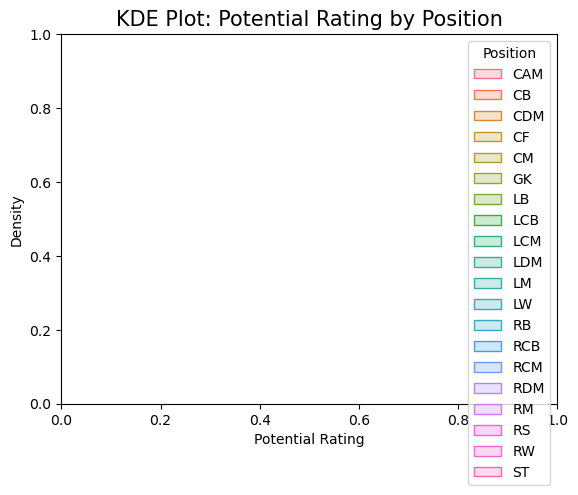

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Potential Rating için KDE plot oluşturma
sns.kdeplot(data=position_stats, x="Potential_Rating", hue="Position", fill=True)
plt.title('KDE Plot: Potential Rating by Position', fontsize=15)
plt.xlabel('Potential Rating')
plt.ylabel('Density')
plt.show()


Violin Plot

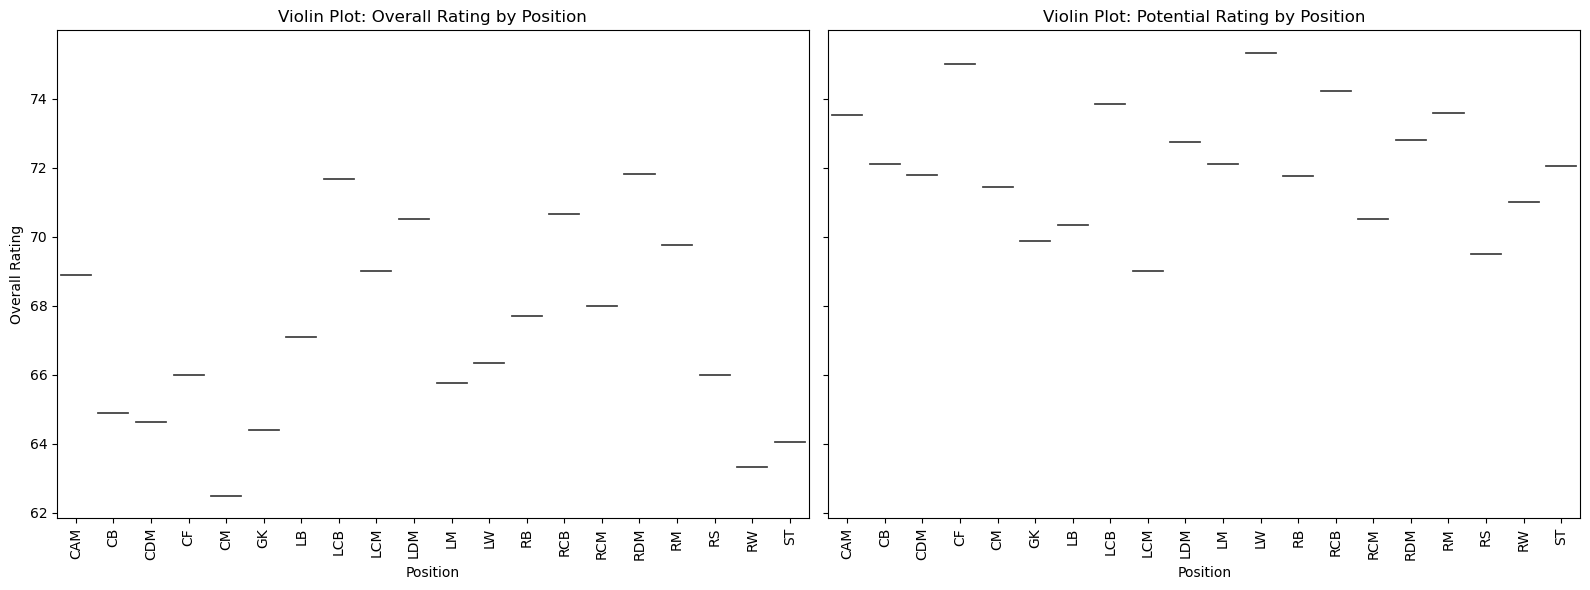

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Genel plotlar oluşturulacak
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Overall Rating için Violin plot
sns.violinplot(data=position_stats, x="Position", y="Overall_Rating", palette="muted", ax=axes[0])
axes[0].set_title('Violin Plot: Overall Rating by Position')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Overall Rating')
axes[0].tick_params(axis='x', rotation=90)  # X ekseni etiketlerini döndürmek için

# Potential Rating için Violin plot
sns.violinplot(data=position_stats, x="Position", y="Potential_Rating", palette="muted", ax=axes[1])
axes[1].set_title('Violin Plot: Potential Rating by Position')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Potential Rating')
axes[1].tick_params(axis='x', rotation=90)  # X ekseni etiketlerini döndürmek için

plt.tight_layout()
plt.show()


Heatmap Plot


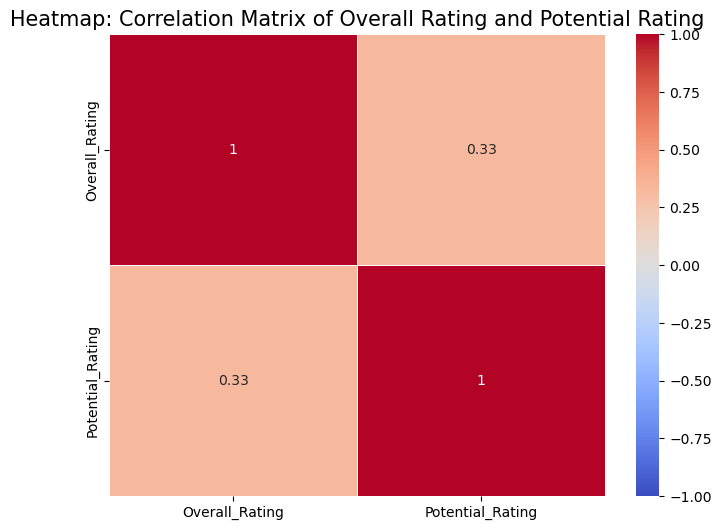

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
correlation_matrix = position_stats[['Overall_Rating', 'Potential_Rating']].corr()

# Heatmap plot oluşturma
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Heatmap: Correlation Matrix of Overall Rating and Potential Rating', fontsize=15)
plt.show()


Box Plot


In [49]:
data.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


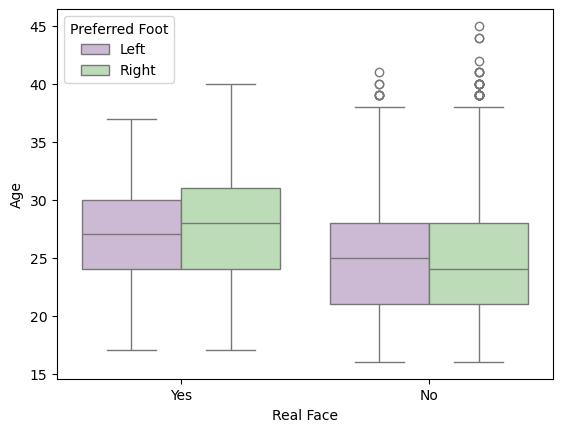

In [50]:
sns.boxplot(x="Real Face", y="Age", hue="Preferred Foot", data=data, palette="PRGn")
plt.show()

Swarm Plot


In [51]:
data = data.iloc[0:500,:]

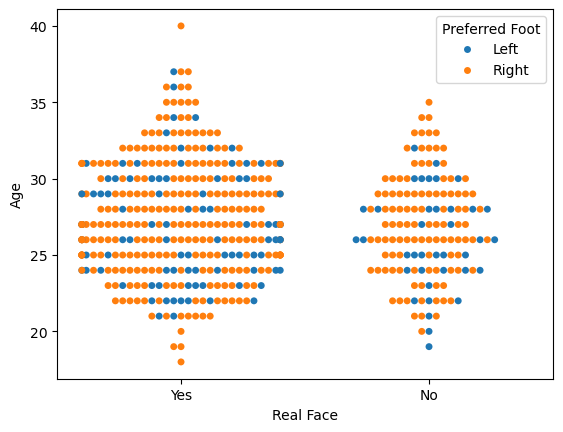

In [52]:
sns.swarmplot(x="Real Face", y="Age",hue="Preferred Foot", data=data)
plt.show()

Pair Plot


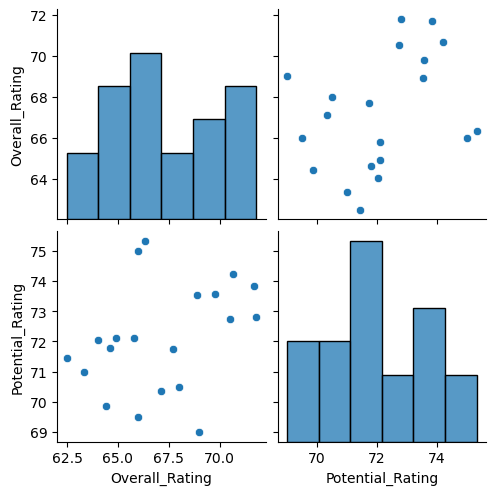

In [53]:
# pair plot
sns.pairplot(position_stats)
plt.show()

Count Plot


Text(0.5, 1.0, 'Foot')

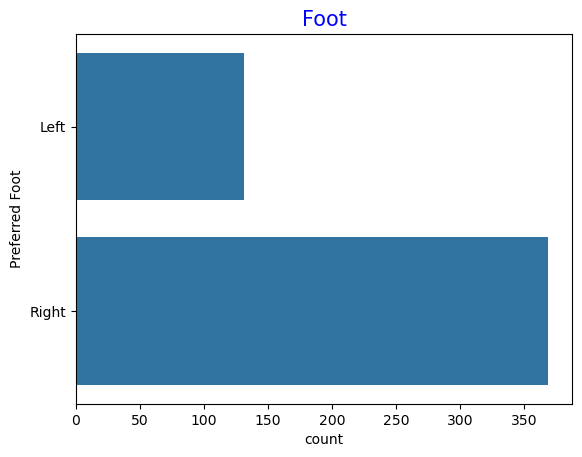

In [55]:
sns.countplot(data["Preferred Foot"])
plt.title("Foot",color = 'blue',fontsize=15)